# Metadata

```yaml
course:   DS 5001 
topic:    Sentiment Analysis
author:   Andrew Chaphiv (acgq2@virginia.edu)
date:    SPR2023
```


# Setting OHCO and Parameters

In [1]:
OHCO = ['abstract_num', 'sent_num']

In [2]:
salex_csv = 'salex_nrc.csv'
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

# Importing Modules and Data Files

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
from IPython.display import display, HTML

In [47]:
TOKENS = pd.read_csv('abstracts-CORPUS.csv').set_index(OHCO).sort_index()
VOCAB = pd.read_csv('abstracts-VOCAB.csv').set_index('term_str').sort_index()
LIB = pd.read_csv('abstracts-LIB.csv').set_index('abstract_num')[['Year']].sort_index()
BOW = pd.read_csv('abstracts-BOW.csv').set_index(['abstract_num','term_str']).sort_index()

In [5]:
SALEX = pd.read_csv(salex_csv).set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [6]:
SALEX

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


# Creating Tables For Model

In [7]:
V = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1) #\

In [68]:
B = BOW.join(V[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()
B = B.join(LIB["Year"], on = 'abstract_num')

In [69]:
for col in emo_cols:
    B[col] = B[col] * B.tfidf
    
B

n        tf     tfidf max_pos     anger  anticipation  \
abstract_num term_str                                                           
1            cancer     4  0.222222  0.450722      NN  0.450722      0.000000   
3            bovine     3  0.214286  2.501423      NN  0.000000      0.000000   
             cancer     2  0.142857  0.289750      NN  0.289750      0.000000   
             present    2  0.142857  0.854592      JJ  0.000000      0.854592   
4            tumour     5  0.833333  4.654872      NN  0.000000      0.000000   
...                    ..       ...       ...     ...       ...           ...   
9796         operation  4  0.181818  1.536530      NN  0.000000      0.000000   
9797         case       3  0.333333  1.857257      NN  0.000000      0.000000   
             radiation  4  0.444444  2.337010      NN  0.000000      0.000000   
             spine      2  0.222222  2.019633      NN  2.019633      0.000000   
             surgery    3  0.333333  1.653021      NN  0.000000      0.000000   

                         disgust      fear       joy   sadness  surprise  \
abstract_num term_str                                                      
1            cancer     0.450722  0.450722  0.000000  0.450722  0.000000   
3            bovine     2.501423  0.000000  0.000000  0.000000  0.000000   
             cancer     0.289750  0.289750  0.000000  0.289750  0.000000   
             present    0.000000  0.000000  0.854592  0.000000  0.854592   
4            tumour     0.000000  4.654872  0.000000  4.654872  0.000000   
...                          ...       ...       ...       ...       ...   
9796         operation  0.000000  1.536530  0.000000  0.000000  0.000000   
9797         case       0.000000  1.857257  0.000000  1.857257  0.000000   
             radiation  0.000000  2.337010  0.000000  0.000000  0.000000   
             spine      0.000000  0.000000  0.000000  0.000000  0.000000   
             surgery    0.000000  1.653021  0.000000  1.653021  0.000000   

                           trust  sentiment  Year  
abstract_num term_str                              
1            cancer     0.000000  -0.450722  1995  
3            bovine     0.000000  -2.501423  1995  
             cancer     0.000000  -0.289750  1995  
             present    0.854592   0.854592  1995  
4            tumour     0.000000  -4.654872  1995  
...                          ...        ...   ...  
9796         operation  1.536530   0.000000  2023  
9797         case       0.000000  -1.857257  2023  
             radiation  0.000000  -2.337010  2023  
             spine      0.000000   0.000000  2023  
             surgery    0.000000   0.000000  2023  

[15606 rows x 14 columns]

In [74]:
B.to_csv("abstracts-SENTIMENTS.csv")

In [70]:
EMO_BOOKS = B.groupby(['Year'])[emo_cols].mean()


In [73]:
EMO_BOOKS.to_csv("abstracts-YEARSENTIMENTS.csv")

# Plotting Sentiments and Emotions 

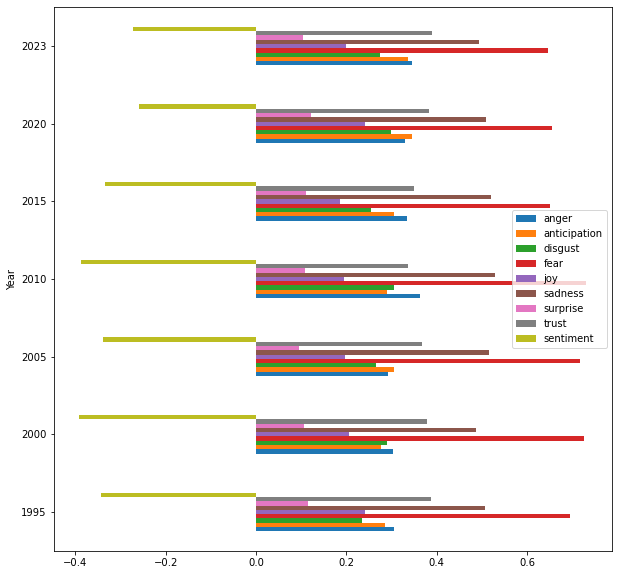

In [72]:
EMO_BOOKS.plot.barh(figsize=(10,10));

In [58]:
def plot_sentiments(df, emo='sentiment'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

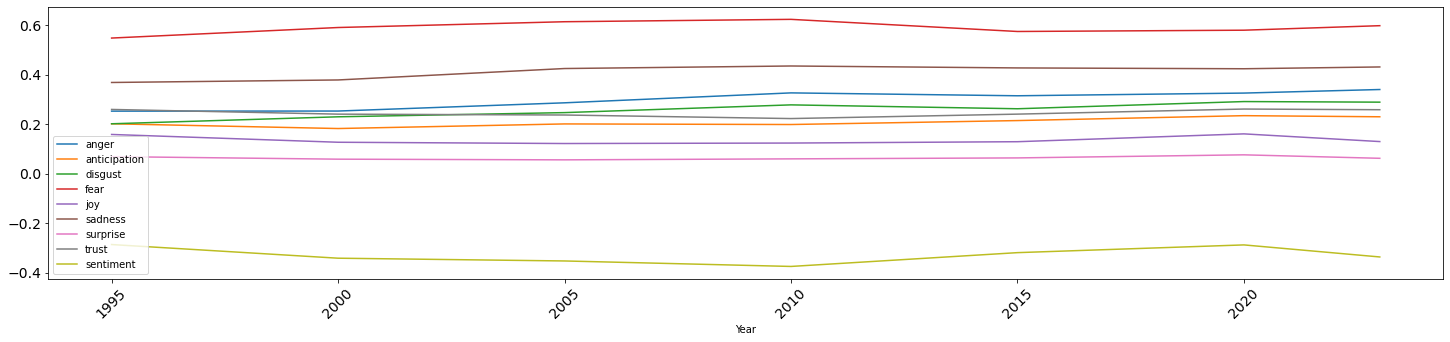

In [61]:
plot_sentiments(EMO_BOOKS, EMO_BOOKS.columns)

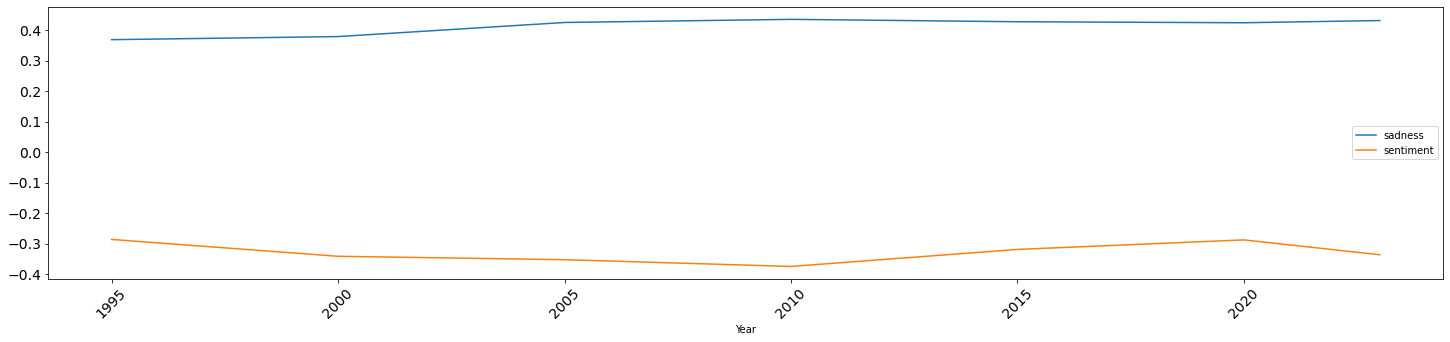

In [63]:
plot_sentiments(EMO_BOOKS, ["sadness", "sentiment"])